In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install dmba

# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dmba import regressionSummary

no display found. Using non-interactive Agg backend


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
# df_copy = pd.read_excel('/content/drive/MyDrive/동아리_스터디_대외활동/기상청 공모전/data/with_2016/final_data.xlsx')
# df_copy.head()

In [ ]:
df_copy = pd.read_excel('/content/drive/MyDrive/동아리_스터디_대외활동/기상청 공모전/data/use_data.xlsx')
df_copy.head()

,back_hospital.yyyymmdd,back_hospital.area,back_hospital.sex,back_hospital.frequency,SO2,CO,O3,NO2,PM10,간호사,...,흡연율,병실수,보건시설,공장수,최저기온,최고기온,일평균기온,일평균습도,강수량,적설
0,2012-01-01,강원,1,3,0.01003,1.01288,0.01910,0.02087,81.56030,3983,...,26.20000,20959,245,2877,-13.90000,6.00000,-7.40000,70.00000,2.85714,0.00000
1,2012-01-01,강원,2,3,0.01003,1.01288,0.01910,0.02087,81.56030,3983,...,26.20000,20959,245,2877,-13.90000,6.00000,-7.40000,70.00000,2.85714,0.00000
2,2012-01-01,경기,1,4,0.00909,0.96221,0.01245,0.03076,85.34368,20380,...,24.50000,123168,334,54213,-12.20000,1.10000,-6.28750,67.62500,0.00000,0.00000
3,2012-01-01,경기,2,5,0.00909,0.96221,0.01245,0.03076,85.34368,20380,...,24.50000,123168,334,54213,-12.20000,1.10000,-6.28750,67.62500,0.00000,0.00000
4,2012-01-01,경남,1,2,0.00897,0.65317,0.02126,0.01750,62.00950,7548,...,24.10000,56963,410,15305,-8.90000,8.00000,1.65000,55.62500,0.00000,0.00000


In [ ]:
df = df_copy.copy()

,yyyymmdd,area,sex,frequency,강수량,적설,일평균기온,일평균습도,최저기온,최고기온,...,신경외과,약국,요양병원,응급의학과,종합병원,흉부외과,흡연율,병실수,보건시설,공장수
0,2016-01-01,경기,1,NaN,0.00000,0.00000,3.56250,69.75000,-0.10000,10.10000,...,518,4588,566,299,112,182,22.10000,142053,330,64061
1,2016-01-02,경기,1,NaN,0.00000,0.00000,5.31250,75.12500,-0.10000,10.10000,...,518,4588,566,299,112,182,22.10000,142053,330,64061
2,2016-01-03,경기,1,NaN,0.00000,0.00000,3.58750,71.00000,-5.00000,9.10000,...,518,4588,566,299,112,182,22.10000,142053,330,64061
3,2016-01-04,경기,1,NaN,0.00000,0.00000,-1.68750,56.00000,-7.80000,7.00000,...,518,4588,566,299,112,182,22.10000,142053,330,64061
4,2016-01-05,경기,1,NaN,1.25000,0.25000,-4.05000,60.62500,-9.80000,3.10000,...,518,4588,566,299,112,182,22.10000,142053,330,64061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12405,2016-12-27,제주,2,NaN,0.00000,0.00000,4.62500,55.00000,1.30000,12.20000,...,32,259,20,37,12,16,26.70000,5894,63,689
12406,2016-12-28,제주,2,NaN,0.00000,0.00000,5.37500,53.12500,2.30000,12.30000,...,32,259,20,37,12,16,26.70000,5894,63,689
12407,2016-12-29,제주,2,NaN,0.00000,0.00000,5.00000,57.50000,2.50000,12.00000,...,32,259,20,37,12,16,26.70000,5894,63,689
12408,2016-12-30,제주,2,NaN,0.25000,0.00000,5.00000,57.50000,1.90000,11.50000,...,32,259,20,37,12,16,26.70000,5894,63,689


In [ ]:
df.columns = ['date', 'area', 'sex',
       'frequency', 'SO2', 'CO', 'O3', 'NO2', 'PM10', '간호사',
       '고령인구비율(A÷B×100)', '구급인력', '구급차', '병원', '비만율', '상급종합병원', '신경외과', '약국',
       '요양병원', '응급의학과', '종합병원', '흉부외과', '흡연율', '병실수', '보건시설', '공장수', '최저기온',
       '최고기온', '일평균기온', '일평균습도', '강수량', '적설']

In [ ]:
df.columns

Index(['date', 'area', 'sex', 'frequency', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       '간호사', '고령인구비율(A÷B×100)', '구급인력', '구급차', '병원', '비만율', '상급종합병원', '신경외과',
       '약국', '요양병원', '응급의학과', '종합병원', '흉부외과', '흡연율', '병실수', '보건시설', '공장수',
       '최저기온', '최고기온', '일평균기온', '일평균습도', '강수량', '적설'],
      dtype='object')

In [ ]:
def cor_show(df):
  plt.figure(figsize=(30,15))
  cor = df.corr()
  sns.heatmap(cor, annot=True)
  plt.show()

def cor(df):
  cor = df.corr()
  cor_target = abs(cor['frequency'])
  return cor_target.sort_values(ascending=False)

### 변수 추가

In [ ]:
# 연도, 월, 일 변수 추가
df['year'], df['month'], df['day'] = (df['date'].dt.year, df['date'].dt.month, df['date'].dt.day)

# 요일 변수 추가 월~일 : 0~6
df['dayofweek'] = df['date'].dt.dayofweek

# 계절 변수 추가
spring_id = (3<= df['month']) & (df['month']<= 5)
summer_id = (6<= df['month']) & (df['month']<= 8)
fall_id = (9<= df['month']) & (df['month']<= 11)
winter_id = (12 == df['month']) | (1<= df['month']) & (df['month']<= 2)
df.loc[spring_id, 'season'] = 1 # 봄
df.loc[summer_id, 'season'] = 2 # 여름
df.loc[fall_id, 'season'] = 3 # 가을
df.loc[winter_id, 'season'] = 4 # 겨울

# 주말 변수 추가
weekend_id = (df['dayofweek'] == 5) | (df['dayofweek'] == 6)
df['weekend'] = 0
df.loc[weekend_id, 'weekend'] = 1

# 일교차 열 추가
df['일교차'] = df['최고기온'] - df['최저기온']
df['일교차']

In [ ]:
df.head()

,date,area,sex,frequency,SO2,CO,O3,NO2,PM10,간호사,...,일평균습도,강수량,적설,year,month,day,dayofweek,season,weekend,일교차
0,2012-01-01,강원,1,3,0.01003,1.01288,0.01910,0.02087,81.56030,3983,...,70.00000,2.85714,0.00000,2012,1,1,6,4.00000,1,19.90000
1,2012-01-01,강원,2,3,0.01003,1.01288,0.01910,0.02087,81.56030,3983,...,70.00000,2.85714,0.00000,2012,1,1,6,4.00000,1,19.90000
2,2012-01-01,경기,1,4,0.00909,0.96221,0.01245,0.03076,85.34368,20380,...,67.62500,0.00000,0.00000,2012,1,1,6,4.00000,1,13.30000
3,2012-01-01,경기,2,5,0.00909,0.96221,0.01245,0.03076,85.34368,20380,...,67.62500,0.00000,0.00000,2012,1,1,6,4.00000,1,13.30000
4,2012-01-01,경남,1,2,0.00897,0.65317,0.02126,0.01750,62.00950,7548,...,55.62500,0.00000,0.00000,2012,1,1,6,4.00000,1,16.90000


In [ ]:
df_spring = df[df['season'] == 1]
df_summer = df[df['season'] == 2]
df_fall = df[df['season'] == 3]
df_winter = df[df['season'] == 4]

In [ ]:
df.columns

Index(['date', 'area', 'sex', 'frequency', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       '간호사', '고령인구비율(A÷B×100)', '구급인력', '구급차', '병원', '비만율', '상급종합병원', '신경외과',
       '약국', '요양병원', '응급의학과', '종합병원', '흉부외과', '흡연율', '병실수', '보건시설', '공장수',
       '최저기온', '최고기온', '일평균기온', '일평균습도', '강수량', '적설', 'year', 'month', 'day',
       'dayofweek', 'season', 'weekend', '일교차'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49674 entries, 0 to 49673
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             49674 non-null  datetime64[ns]
 1   area             49674 non-null  object        
 2   sex              49674 non-null  int64         
 3   frequency        49674 non-null  int64         
 4   SO2              49674 non-null  float64       
 5   CO               49674 non-null  float64       
 6   O3               49674 non-null  float64       
 7   NO2              49674 non-null  float64       
 8   PM10             49674 non-null  float64       
 9   간호사              49674 non-null  int64         
 10  고령인구비율(A÷B×100)  49674 non-null  float64       
 11  구급인력             49674 non-null  int64         
 12  구급차              49674 non-null  int64         
 13  병원               49674 non-null  int64         
 14  비만율              49674 non-null  float

In [ ]:
df.columns

Index(['date', 'area', 'sex', 'frequency', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       '간호사', '고령인구비율(A÷B×100)', '구급인력', '구급차', '병원', '비만율', '상급종합병원', '신경외과',
       '약국', '요양병원', '응급의학과', '종합병원', '흉부외과', '흡연율', '병실수', '보건시설', '공장수',
       '최저기온', '최고기온', '일평균기온', '일평균습도', '강수량', '적설', 'year', 'month', 'day',
       'dayofweek', 'season', 'weekend', '일교차'],
      dtype='object')

In [ ]:
df_enc = pd.get_dummies(df, columns = ['sex', 'area', 'month', 'day', 'dayofweek', 'season', 'weekend'])
df_enc

,date,frequency,SO2,CO,O3,NO2,PM10,간호사,고령인구비율(A÷B×100),구급인력,...,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,season_1.0,season_2.0,season_3.0,season_4.0,weekend_0,weekend_1
0,2012-01-01,3,0.01003,1.01288,0.01910,0.02087,81.56030,3983,15.70000,566,...,0,0,0,1,0,0,0,1,0,1
1,2012-01-01,3,0.01003,1.01288,0.01910,0.02087,81.56030,3983,15.70000,566,...,0,0,0,1,0,0,0,1,0,1
2,2012-01-01,4,0.00909,0.96221,0.01245,0.03076,85.34368,20380,9.40000,1421,...,0,0,0,1,0,0,0,1,0,1
3,2012-01-01,5,0.00909,0.96221,0.01245,0.03076,85.34368,20380,9.40000,1421,...,0,0,0,1,0,0,0,1,0,1
4,2012-01-01,2,0.00897,0.65317,0.02126,0.01750,62.00950,7548,12.50000,731,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49669,2015-12-31,0,0.00290,0.53943,0.03477,0.00991,74.85417,2231,13.80000,208,...,1,0,0,0,0,0,0,1,1,0
49670,2015-12-31,0,0.00457,0.78625,0.01800,0.01984,53.58750,4424,16.40000,639,...,1,0,0,0,0,0,0,1,1,0
49671,2015-12-31,0,0.00457,0.78625,0.01800,0.01984,53.58750,4424,16.40000,639,...,1,0,0,0,0,0,0,1,1,0
49672,2015-12-31,1,0.00560,0.84956,0.00982,0.02870,63.08693,3726,14.80000,443,...,1,0,0,0,0,0,0,1,1,0


In [ ]:
print(df.shape)
print(df_enc.shape)

(49674, 39)
(49674, 107)


## 훈련하기

In [ ]:
col_idx = (df_enc.columns != 'frequency') & (df_enc.columns != 'date')

In [ ]:
df_enc.columns

Index(['date', 'frequency', 'SO2', 'CO', 'O3', 'NO2', 'PM10', '간호사',
       '고령인구비율(A÷B×100)', '구급인력',
       ...
       'dayofweek_3', 'dayofweek_4', 'dayofweek_5', 'dayofweek_6',
       'season_1.0', 'season_2.0', 'season_3.0', 'season_4.0', 'weekend_0',
       'weekend_1'],
      dtype='object', length=107)

In [ ]:
X = df_enc.iloc[:,col_idx]
y = df_enc['frequency']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)
# rnd_clf = RandomForestRegressor()
# rnd_clf.fit(X_train, y_train)

In [ ]:
# rnd_clf.feature_importances_

NameError: ignored

In [ ]:
# pd.DataFrame(rnd_clf.feature_importances_ ,index=X_train.columns, columns=['importance']).sort_values(by='importance', ascending=False)[:30].plot.bar(figsize=(30,10))

# 변수 선택

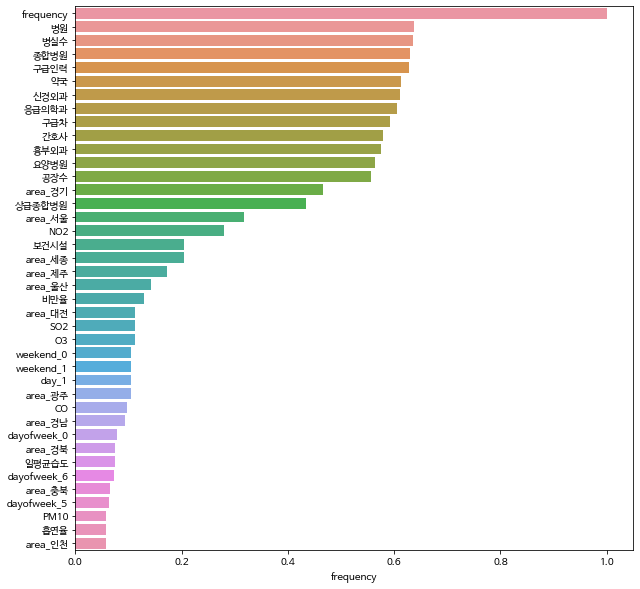

In [ ]:
a = cor(df_enc)[:40]
plt.figure(figsize=(10, 10))
sns.barplot(y=a.index, x=a)

# 훈련 시키기

## 정규화

In [ ]:
X = df_enc.iloc[:,col_idx]
y = df_enc['frequency']
X

,SO2,CO,O3,NO2,PM10,간호사,고령인구비율(A÷B×100),구급인력,구급차,병원,...,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,season_1.0,season_2.0,season_3.0,season_4.0,weekend_0,weekend_1
0,0.01003,1.01288,0.01910,0.02087,81.56030,3983,15.70000,566,871,49,...,0,0,0,1,0,0,0,1,0,1
1,0.01003,1.01288,0.01910,0.02087,81.56030,3983,15.70000,566,871,49,...,0,0,0,1,0,0,0,1,0,1
2,0.00909,0.96221,0.01245,0.03076,85.34368,20380,9.40000,1421,1796,281,...,0,0,0,1,0,0,0,1,0,1
3,0.00909,0.96221,0.01245,0.03076,85.34368,20380,9.40000,1421,1796,281,...,0,0,0,1,0,0,0,1,0,1
4,0.00897,0.65317,0.02126,0.01750,62.00950,7548,12.50000,731,515,140,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49669,0.00290,0.53943,0.03477,0.00991,74.85417,2231,13.80000,208,71,7,...,1,0,0,0,0,0,0,1,1,0
49670,0.00457,0.78625,0.01800,0.01984,53.58750,4424,16.40000,639,371,52,...,1,0,0,0,0,0,0,1,1,0
49671,0.00457,0.78625,0.01800,0.01984,53.58750,4424,16.40000,639,371,52,...,1,0,0,0,0,0,0,1,1,0
49672,0.00560,0.84956,0.00982,0.02870,63.08693,3726,14.80000,443,284,40,...,1,0,0,0,0,0,0,1,1,0


In [ ]:
X.columns

Index(['SO2', 'CO', 'O3', 'NO2', 'PM10', '간호사', '고령인구비율(A÷B×100)', '구급인력',
       '구급차', '병원',
       ...
       'dayofweek_3', 'dayofweek_4', 'dayofweek_5', 'dayofweek_6',
       'season_1.0', 'season_2.0', 'season_3.0', 'season_4.0', 'weekend_0',
       'weekend_1'],
      dtype='object', length=105)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
pd.DataFrame(X_std, columns=X.columns)

,SO2,CO,O3,NO2,PM10,간호사,고령인구비율(A÷B×100),구급인력,구급차,병원,...,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,season_1.0,season_2.0,season_3.0,season_4.0,weekend_0,weekend_1
0,2.37917,2.86630,-0.74378,0.03887,1.53744,-0.48981,0.76826,0.28066,0.97793,-0.52255,...,-0.40857,-0.40743,-0.40743,2.44754,-0.58025,-0.58025,-0.57603,1.74559,-1.58228,1.58228
1,2.37917,2.86630,-0.74378,0.03887,1.53744,-0.48981,0.76826,0.28066,0.97793,-0.52255,...,-0.40857,-0.40743,-0.40743,2.44754,-0.58025,-0.58025,-0.57603,1.74559,-1.58228,1.58228
2,1.95671,2.58376,-1.31968,1.00941,1.70064,1.39472,-1.25182,2.86840,3.13847,2.75674,...,-0.40857,-0.40743,-0.40743,2.44754,-0.58025,-0.58025,-0.57603,1.74559,-1.58228,1.58228
3,1.95671,2.58376,-1.31968,1.00941,1.70064,1.39472,-1.25182,2.86840,3.13847,2.75674,...,-0.40857,-0.40743,-0.40743,2.44754,-0.58025,-0.58025,-0.57603,1.74559,-1.58228,1.58228
4,1.90423,0.86071,-0.55646,-0.29222,0.69408,-0.08008,-0.25781,0.78005,0.14641,0.76372,...,-0.40857,-0.40743,-0.40743,2.44754,-0.58025,-0.58025,-0.57603,1.74559,-1.58228,1.58228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49669,-0.82155,0.22649,0.61360,-1.03689,1.24816,-0.69117,0.15903,-0.80285,-0.89066,-1.11622,...,2.44754,-0.40743,-0.40743,-0.40857,-0.58025,-0.58025,-0.57603,1.74559,0.63200,-0.63200
49670,-0.07288,1.60269,-0.83928,-0.06222,0.33078,-0.43912,0.99272,0.50161,-0.18994,-0.48015,...,2.44754,-0.40743,-0.40743,-0.40857,-0.58025,-0.58025,-0.57603,1.74559,0.63200,-0.63200
49671,-0.07288,1.60269,-0.83928,-0.06222,0.33078,-0.43912,0.99272,0.50161,-0.18994,-0.48015,...,2.44754,-0.40743,-0.40743,-0.40857,-0.58025,-0.58025,-0.57603,1.74559,0.63200,-0.63200
49672,0.38776,1.95571,-1.54756,0.80734,0.74055,-0.51934,0.47968,-0.09161,-0.39315,-0.64977,...,2.44754,-0.40743,-0.40743,-0.40857,-0.58025,-0.58025,-0.57603,1.74559,0.63200,-0.63200


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=.2)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=.2)

In [ ]:
print('train set', X_train.shape, y_train.shape)
# print('validation set', X_valid.shape, y_valid.shape)
print('test set', X_test.shape, y_test.shape)

train set (39739, 105) (39739,)
validation set (7948, 105) (7948,)
test set (9935, 105) (9935,)


In [ ]:
from sklearn.model_selection import cross_val_score

# X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=.2)

In [ ]:
X.columns

Index(['SO2', 'CO', 'O3', 'NO2', 'PM10', '간호사', '고령인구비율(A÷B×100)', '구급인력',
       '구급차', '병원',
       ...
       'dayofweek_3', 'dayofweek_4', 'dayofweek_5', 'dayofweek_6',
       'season_1.0', 'season_2.0', 'season_3.0', 'season_4.0', 'weekend_0',
       'weekend_1'],
      dtype='object', length=105)

In [ ]:
# 모델 계수 저장
save_model_coef = pd.DataFrame(columns=X.columns, index=['lin_reg', 'ridge_reg', 'lasso_reg', 'elastic_net'])
save_model_coef

,SO2,CO,O3,NO2,PM10,간호사,고령인구비율(A÷B×100),구급인력,구급차,병원,...,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,season_1.0,season_2.0,season_3.0,season_4.0,weekend_0,weekend_1
lin_reg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ridge_reg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lasso_reg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elastic_net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['date', 'area', 'sex', 'frequency', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       '간호사', '고령인구비율(A÷B×100)', '구급인력', '구급차', '병원', '비만율', '상급종합병원', '신경외과',
       '약국', '요양병원', '응급의학과', '종합병원', '흉부외과', '흡연율', '병실수', '보건시설', '공장수',
       '최저기온', '최고기온', '일평균기온', '일평균습도', '강수량', '적설', 'year', 'month', 'day',
       'dayofweek', 'season', 'weekend', '일교차'],
      dtype='object')

## 2016 전처리

In [ ]:
df_copy_2016 = pd.read_excel('/content/drive/MyDrive/동아리_스터디_대외활동/기상청 공모전/data/with_2016/final_data_2016 (1).xlsx')

In [ ]:
df_2016 = df_copy_2016.copy()
df_2016

,yyyymmdd,area,sex,frequency,강수량,적설,일평균기온,일평균습도,최저기온,최고기온,...,흉부외과,흡연율,병실수,보건시설,공장수,SO2,CO,O3,NO2,PM10
0,2016-01-01,경기,1,NaN,0.00000,0.00000,3.56250,69.75000,-0.10000,10.10000,...,182,22.10000,142053,330,64061,0.00535,0.92636,0.00908,0.03750,76.16025
1,2016-01-02,경기,1,NaN,0.00000,0.00000,5.31250,75.12500,-0.10000,10.10000,...,182,22.10000,142053,330,64061,0.00530,0.73243,0.01314,0.03457,57.96626
2,2016-01-03,경기,1,NaN,0.00000,0.00000,3.58750,71.00000,-5.00000,9.10000,...,182,22.10000,142053,330,64061,0.00608,0.99032,0.01242,0.04052,97.21075
3,2016-01-04,경기,1,NaN,0.00000,0.00000,-1.68750,56.00000,-7.80000,7.00000,...,182,22.10000,142053,330,64061,0.00564,0.69321,0.02095,0.02868,83.31975
4,2016-01-05,경기,1,NaN,1.25000,0.25000,-4.05000,60.62500,-9.80000,3.10000,...,182,22.10000,142053,330,64061,0.00538,0.50842,0.01576,0.02568,39.33630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13135,2016-12-27,제주,2,NaN,0.00000,0.00000,4.62500,55.00000,1.30000,12.20000,...,16,26.70000,5894,63,689,0.00146,0.22617,0.03665,0.00544,32.14742
13136,2016-12-28,제주,2,NaN,0.00000,0.00000,5.37500,53.12500,2.30000,12.30000,...,16,26.70000,5894,63,689,0.00153,0.17490,0.03176,0.01038,27.41623
13137,2016-12-29,제주,2,NaN,0.00000,0.00000,5.00000,57.50000,2.50000,12.00000,...,16,26.70000,5894,63,689,0.00152,0.19748,0.03645,0.00712,33.95184
13138,2016-12-30,제주,2,NaN,0.25000,0.00000,5.00000,57.50000,1.90000,11.50000,...,16,26.70000,5894,63,689,0.00134,0.19123,0.02870,0.01182,29.65380


In [ ]:
df_2016.columns

Index(['yyyymmdd', 'area', 'sex', 'frequency', '강수량', '적설', '일평균기온', '일평균습도',
       '최저기온', '최고기온', '간호사', '고령인구비율', '구급인력', '구급차', '병원', '비만율', '상급종합병원',
       '신경외과', '약국', '요양병원', '응급의학과', '종합병원', '흉부외과', '흡연율', '병실수', '보건시설',
       '공장수', 'SO2', 'CO', 'O3', 'NO2', 'PM10'],
      dtype='object')

In [ ]:
df_2016.columns = ['date', 'area', 'sex', 'frequency', '강수량', '적설', '일평균기온', '일평균습도',
       '최저기온', '최고기온', '간호사', '고령인구비율(A÷B×100)', '구급인력', '구급차', '병원', '비만율', '상급종합병원',
       '신경외과', '약국', '요양병원', '응급의학과', '종합병원', '흉부외과', '흡연율', '병실수', '보건시설',
       '공장수', 'SO2', 'CO', 'O3', 'NO2', 'PM10']

In [ ]:
def make_X_2016(df):

  # 연도, 월, 일 변수 추가
  df['year'], df['month'], df['day'] = (df['date'].dt.year, df['date'].dt.month, df['date'].dt.day)

  # 요일 변수 추가 월~일 : 0~6
  df['dayofweek'] = df['date'].dt.dayofweek

  # 계절 변수 추가
  spring_id = (3<= df['month']) & (df['month']<= 5)
  summer_id = (6<= df['month']) & (df['month']<= 8)
  fall_id = (9<= df['month']) & (df['month']<= 11)
  winter_id = (12 == df['month']) | (1<= df['month']) & (df['month']<= 2)
  df.loc[spring_id, 'season'] = 1 # 봄
  df.loc[summer_id, 'season'] = 2 # 여름
  df.loc[fall_id, 'season'] = 3 # 가을
  df.loc[winter_id, 'season'] = 4 # 겨울

  # 주말 변수 추가
  weekend_id = (df['dayofweek'] == 5) | (df['dayofweek'] == 6)
  df['weekend'] = 0
  df.loc[weekend_id, 'weekend'] = 1

  # 일교차 열 추가
  df['일교차'] = df['최고기온'] - df['최저기온']
  df['일교차']


  df_enc_2016 = pd.get_dummies(df_2016, columns = ['sex', 'area', 'month', 'day', 'dayofweek', 'season', 'weekend'])
  df_enc_2016
  return df_enc_2016

In [ ]:
# df_2016 컬럼 df와 맞추기
X_2016 = make_X_2016(df_2016).iloc[:,col_idx]

X_2016 = X_2016[X.columns]
X_2016.columns

Index(['SO2', 'CO', 'O3', 'NO2', 'PM10', '간호사', '고령인구비율(A÷B×100)', '구급인력',
       '구급차', '병원',
       ...
       'dayofweek_3', 'dayofweek_4', 'dayofweek_5', 'dayofweek_6',
       'season_1.0', 'season_2.0', 'season_3.0', 'season_4.0', 'weekend_0',
       'weekend_1'],
      dtype='object', length=105)

In [ ]:
# 표준화
X_final_valid = scaler.transform(X_2016)

In [ ]:
X_final_valid

array([[ 0.27865653,  2.38391312, -1.6113028 , ...,  1.74559199,
         0.63200102, -0.63200102],
       [ 0.25231117,  1.30261643, -1.26005081, ...,  1.74559199,
        -1.58227593,  1.58227593],
       [ 0.60381695,  2.74050305, -1.32237977, ...,  1.74559199,
        -1.58227593,  1.58227593],
       ...,
       [-1.44302577, -1.68009586,  0.75885543, ...,  1.74559199,
         0.63200102, -0.63200102],
       [-1.52378339, -1.71494379,  0.08762732, ...,  1.74559199,
         0.63200102, -0.63200102],
       [-1.52439248, -1.69751982,  0.11920391, ...,  1.74559199,
        -1.58227593,  1.58227593]])

## 선형 회귀
- Root Mean Squared Error (RMSE) : 1.2185

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print('---------- train set score ----------')
regressionSummary(y_train, lin_reg.predict(X_train))

# print('---------- valid set score ----------')
# regressionSummary(y_valid, lin_reg.predict(X_valid))

y_pred = lin_reg.predict(X_test)
print('\n---------- test set score ----------')
regressionSummary(y_test, lin_reg.predict(X_test))

---------- train set score ----------

Regression statistics

               Mean Error (ME) : -0.0001
Root Mean Squared Error (RMSE) : 1.2233
     Mean Absolute Error (MAE) : 0.9010

---------- test set score ----------

Regression statistics

               Mean Error (ME) : -0.0098
Root Mean Squared Error (RMSE) : 1.2219
     Mean Absolute Error (MAE) : 0.9026


In [ ]:
y_pred = lin_reg.predict(X_final_valid)
print('\n---------- final_valid set score ----------')
y_pred


---------- final_valid set score ----------


array([6.50247389, 5.36936599, 5.25919753, ..., 0.28753859, 0.18558317,
       0.01795989])

In [ ]:
save_model_coef.loc['lin_reg'] = lin_reg.coef_
save_model_coef

,SO2,CO,O3,NO2,PM10,간호사,고령인구비율(A÷B×100),구급인력,구급차,병원,...,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,season_1.0,season_2.0,season_3.0,season_4.0,weekend_0,weekend_1
lin_reg,0.00447,-0.03270,-0.00649,0.03668,0.02137,0.24052,-0.04452,0.03620,0.03813,-0.08810,...,1450609946.74074,1447713241.02066,-17564803639.48305,-17599948767.30057,-97459452668.22075,-13977999058.48814,11281941528.34283,-36204428656.53851,-21771670845.68651,2800905127.86718
ridge_reg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lasso_reg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elastic_net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-scores)
print(rmse)
print(sum(rmse)/len(rmse))

[1.21275718 1.24311656 1.22403601 1.23371937 1.21989179]
1.2267041816466704


## 규제가 있는 선형 모델

### 릿지 회귀
- Root Mean Squared Error (RMSE) : 1.2184
- SGD: Root Mean Squared Error (RMSE) : 1.2349

In [ ]:
# 정규방정식 사용
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_valid)
print('---------- valid set score ----------')
regressionSummary(y_valid, ridge_reg.predict(X_valid))

y_pred = ridge_reg.predict(X_test)
print('\n---------- test set score ----------')
regressionSummary(y_test, ridge_reg.predict(X_test))

---------- valid set score ----------

Regression statistics

               Mean Error (ME) : -0.0106
Root Mean Squared Error (RMSE) : 1.2141
     Mean Absolute Error (MAE) : 0.8910

---------- test set score ----------

Regression statistics

               Mean Error (ME) : -0.0099
Root Mean Squared Error (RMSE) : 1.2220
     Mean Absolute Error (MAE) : 0.9028


In [ ]:
save_model_coef.loc['ridge_reg'] = ridge_reg.coef_
save_model_coef

,SO2,CO,O3,NO2,PM10,간호사,고령인구비율(A÷B×100),구급인력,구급차,병원,...,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,season_1.0,season_2.0,season_3.0,season_4.0,weekend_0,weekend_1
lin_reg,0.00447,-0.03270,-0.00649,0.03668,0.02137,0.24052,-0.04452,0.03620,0.03813,-0.08810,...,1450609946.74074,1447713241.02066,-17564803639.48305,-17599948767.30057,-97459452668.22075,-13977999058.48814,11281941528.34283,-36204428656.53851,-21771670845.68651,2800905127.86718
ridge_reg,0.00483,-0.03325,-0.00630,0.03718,0.02136,0.33585,-0.01639,0.02005,0.08137,-0.04919,...,-0.01619,-0.03285,-0.03038,-0.04233,0.00067,0.00154,-0.00538,0.00317,0.05632,-0.05632
lasso_reg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elastic_net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ridge_reg = Ridge(alpha=1, solver='cholesky')
scores = cross_val_score(ridge_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-scores)
print(rmse)
print(sum(rmse)/len(rmse))

[1.21273972 1.24311309 1.22406963 1.23373361 1.21993455]
1.226718119956879


In [ ]:
# 확률적 경사하강법 사용
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X_train, y_train)
y_pred = sgd_reg.predict(X_valid)
print('---------- valid set score ----------')
regressionSummary(y_valid, sgd_reg.predict(X_valid))

y_pred = sgd_reg.predict(X_test)
print('\n---------- test set score ----------')
regressionSummary(y_test, sgd_reg.predict(X_test))

---------- valid set score ----------

Regression statistics

               Mean Error (ME) : -0.0131
Root Mean Squared Error (RMSE) : 1.2253
     Mean Absolute Error (MAE) : 0.9071

---------- test set score ----------

Regression statistics

               Mean Error (ME) : -0.0146
Root Mean Squared Error (RMSE) : 1.2325
     Mean Absolute Error (MAE) : 0.9189


In [ ]:
sgd_reg = SGDRegressor(penalty='l2')
scores = cross_val_score(sgd_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-scores)
print(rmse)
print(sum(rmse)/len(rmse))

[1.23857064 1.2544389  1.23862852 1.24443958 1.22568615]
1.2403527552039955


### 라쏘 회귀
- Root Mean Squared Error (RMSE) : 1.2396
- SGD: Root Mean Squared Error (RMSE) : 1.2254


In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_valid)
print('---------- valid set score ----------')
regressionSummary(y_valid, lasso_reg.predict(X_valid))

y_pred = lasso_reg.predict(X_test)
print('\n---------- test set score ----------')
regressionSummary(y_test, lasso_reg.predict(X_test))

---------- valid set score ----------

Regression statistics

               Mean Error (ME) : -0.0093
Root Mean Squared Error (RMSE) : 1.2395
     Mean Absolute Error (MAE) : 0.9085

---------- test set score ----------

Regression statistics

               Mean Error (ME) : -0.0142
Root Mean Squared Error (RMSE) : 1.2398
     Mean Absolute Error (MAE) : 0.9168


In [ ]:
save_model_coef.loc['lasso_reg'] = lasso_reg.coef_
save_model_coef

,SO2,CO,O3,NO2,PM10,간호사,고령인구비율(A÷B×100),구급인력,구급차,병원,...,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,season_1.0,season_2.0,season_3.0,season_4.0,weekend_0,weekend_1
lin_reg,0.00447,-0.03270,-0.00649,0.03668,0.02137,0.24052,-0.04452,0.03620,0.03813,-0.08810,...,1450609946.74074,1447713241.02066,-17564803639.48305,-17599948767.30057,-97459452668.22075,-13977999058.48814,11281941528.34283,-36204428656.53851,-21771670845.68651,2800905127.86718
ridge_reg,0.00483,-0.03325,-0.00630,0.03718,0.02136,0.33585,-0.01639,0.02005,0.08137,-0.04919,...,-0.01619,-0.03285,-0.03038,-0.04233,0.00067,0.00154,-0.00538,0.00317,0.05632,-0.05632
lasso_reg,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.40564,0.00000,0.28327,...,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.07622,-0.00000
elastic_net,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.21440,0.04935,0.20094,...,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.05729,-0.05729


In [ ]:
lasso_coef = pd.DataFrame(lasso_reg.coef_ ,index=X.columns, columns=['coef_'])
used_lasso_coef = lasso_coef[lasso_coef['coef_'] != 0].sort_values(by='coef_', ascending=False)
used_lasso_coef

,coef_
구급인력,0.40564
병원,0.28327
병실수,0.14636
약국,0.10151
day_1,0.08078
weekend_0,0.07622
요양병원,0.06573
종합병원,0.04391
dayofweek_0,0.01509
weekend_1,-0.00000


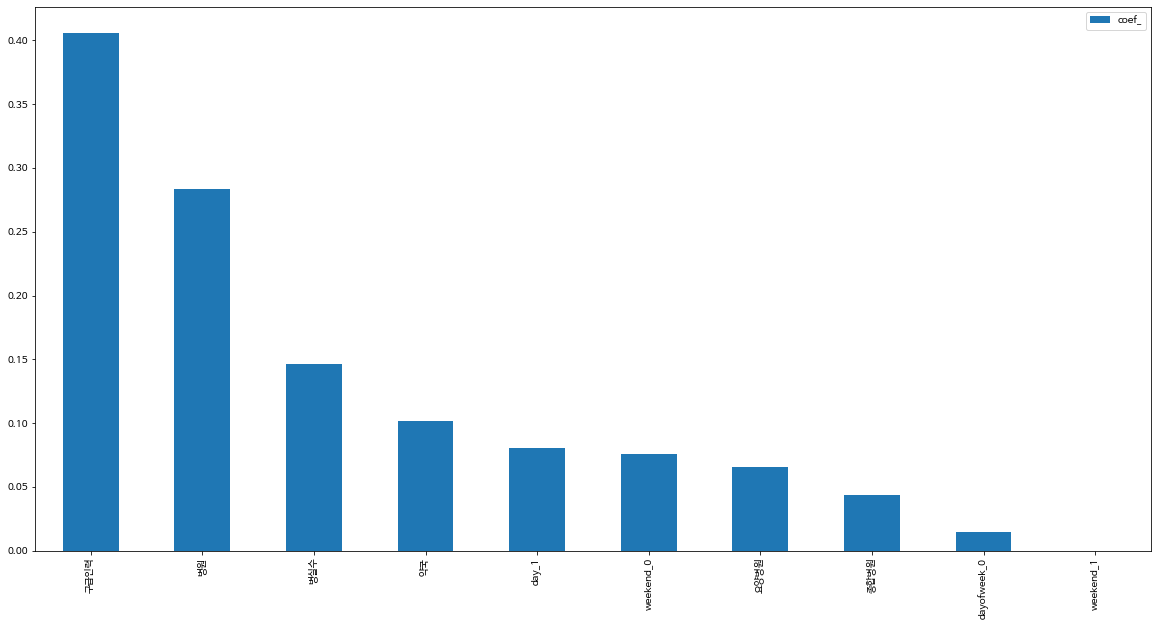

In [ ]:
used_lasso_coef.plot.bar(figsize=(20,10))

In [ ]:
print("훈련 세트의 정확도 : {:.2f}".format(lasso_reg.score(X_train, y_train)))

print("테스트 세트의 정확도 : {:.2f}".format(lasso_reg.score(X_test, y_test)))

print("사용한 특성의 수 : {}".format(np.sum(lasso_reg.coef_ != 0)))

print("사용한 max_iter : {}".format(lasso_reg.n_iter_))

훈련 세트의 정확도 : 0.45
테스트 세트의 정확도 : 0.44
사용한 특성의 수 : 10
사용한 max_iter : 317


In [ ]:
lasso_reg = Lasso(alpha=0.1)
scores = cross_val_score(lasso_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-scores)
print(rmse)
print(sum(rmse)/len(rmse))

[1.22800602 1.2659253  1.24226479 1.26096379 1.24416356]
1.248264692314517


In [ ]:
############# 최종 모델 예측 ###############
# 확률적 경사하강법 사용
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X_train, y_train)
y_pred = sgd_reg.predict(X_valid)
print('---------- valid set score ----------')
regressionSummary(y_valid, sgd_reg.predict(X_valid))

y_pred = sgd_reg.predict(X_test)
print('\n---------- test set score ----------')
regressionSummary(y_test, sgd_reg.predict(X_test))

---------- valid set score ----------

Regression statistics

               Mean Error (ME) : -0.0300
Root Mean Squared Error (RMSE) : 1.2172
     Mean Absolute Error (MAE) : 0.8954

---------- test set score ----------

Regression statistics

               Mean Error (ME) : -0.0293
Root Mean Squared Error (RMSE) : 1.2253
     Mean Absolute Error (MAE) : 0.9078


In [ ]:
############# 최종 모델 예측 ###############
y_pred_final = sgd_reg.predict(X_final_valid)
print('\n---------- final_valid set score ----------')
y_pred_final


---------- final_valid set score ----------


array([ 6.2807669 ,  5.17343131,  5.06890287, ...,  0.25907995,
       -0.01960587,  0.02643804])

In [ ]:
print(X_2016.columns.shape)
print(y_pred_final.reshape(1,-1).shape)

(105,)
(1, 13140)


In [ ]:
final_result = pd.DataFrame(y_pred_final, columns=['frequency'])
final_result

,frequency
0,6.28077
1,5.17343
2,5.06890
3,5.59131
4,5.28717
...,...
13135,0.24804
13136,0.39861
13137,0.25908
13138,-0.01961


In [ ]:
df_2016['frequency'] = final_result
df_2016

,date,area,sex,frequency,강수량,적설,일평균기온,일평균습도,최저기온,최고기온,...,O3,NO2,PM10,year,month,day,dayofweek,season,weekend,일교차
0,2016-01-01,경기,1,6.28077,0.00000,0.00000,3.56250,69.75000,-0.10000,10.10000,...,0.00908,0.03750,76.16025,2016,1,1,4,4.00000,0,10.20000
1,2016-01-02,경기,1,5.17343,0.00000,0.00000,5.31250,75.12500,-0.10000,10.10000,...,0.01314,0.03457,57.96626,2016,1,2,5,4.00000,1,10.20000
2,2016-01-03,경기,1,5.06890,0.00000,0.00000,3.58750,71.00000,-5.00000,9.10000,...,0.01242,0.04052,97.21075,2016,1,3,6,4.00000,1,14.10000
3,2016-01-04,경기,1,5.59131,0.00000,0.00000,-1.68750,56.00000,-7.80000,7.00000,...,0.02095,0.02868,83.31975,2016,1,4,0,4.00000,0,14.80000
4,2016-01-05,경기,1,5.28717,1.25000,0.25000,-4.05000,60.62500,-9.80000,3.10000,...,0.01576,0.02568,39.33630,2016,1,5,1,4.00000,0,12.90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13135,2016-12-27,제주,2,0.24804,0.00000,0.00000,4.62500,55.00000,1.30000,12.20000,...,0.03665,0.00544,32.14742,2016,12,27,1,4.00000,0,10.90000
13136,2016-12-28,제주,2,0.39861,0.00000,0.00000,5.37500,53.12500,2.30000,12.30000,...,0.03176,0.01038,27.41623,2016,12,28,2,4.00000,0,10.00000
13137,2016-12-29,제주,2,0.25908,0.00000,0.00000,5.00000,57.50000,2.50000,12.00000,...,0.03645,0.00712,33.95184,2016,12,29,3,4.00000,0,9.50000
13138,2016-12-30,제주,2,-0.01961,0.25000,0.00000,5.00000,57.50000,1.90000,11.50000,...,0.02870,0.01182,29.65380,2016,12,30,4,4.00000,0,9.60000


In [ ]:
df_2016.head()

,date,area,sex,frequency,강수량,적설,일평균기온,일평균습도,최저기온,최고기온,...,O3,NO2,PM10,year,month,day,dayofweek,season,weekend,일교차
0,2016-01-01,경기,1,6.28077,0.00000,0.00000,3.56250,69.75000,-0.10000,10.10000,...,0.00908,0.03750,76.16025,2016,1,1,4,4.00000,0,10.20000
1,2016-01-02,경기,1,5.17343,0.00000,0.00000,5.31250,75.12500,-0.10000,10.10000,...,0.01314,0.03457,57.96626,2016,1,2,5,4.00000,1,10.20000
2,2016-01-03,경기,1,5.06890,0.00000,0.00000,3.58750,71.00000,-5.00000,9.10000,...,0.01242,0.04052,97.21075,2016,1,3,6,4.00000,1,14.10000
3,2016-01-04,경기,1,5.59131,0.00000,0.00000,-1.68750,56.00000,-7.80000,7.00000,...,0.02095,0.02868,83.31975,2016,1,4,0,4.00000,0,14.80000
4,2016-01-05,경기,1,5.28717,1.25000,0.25000,-4.05000,60.62500,-9.80000,3.10000,...,0.01576,0.02568,39.33630,2016,1,5,1,4.00000,0,12.90000


In [ ]:
df_2016.to_csv('df_2016.csv')

In [ ]:
pd.read_csv('df_2016.csv')

,Unnamed: 0,date,area,sex,frequency,강수량,적설,일평균기온,일평균습도,최저기온,...,O3,NO2,PM10,year,month,day,dayofweek,season,weekend,일교차
0,0,2016-01-01,경기,1,6.28077,0.00000,0.00000,3.56250,69.75000,-0.10000,...,0.00908,0.03750,76.16025,2016,1,1,4,4.00000,0,10.20000
1,1,2016-01-02,경기,1,5.17343,0.00000,0.00000,5.31250,75.12500,-0.10000,...,0.01314,0.03457,57.96626,2016,1,2,5,4.00000,1,10.20000
2,2,2016-01-03,경기,1,5.06890,0.00000,0.00000,3.58750,71.00000,-5.00000,...,0.01242,0.04052,97.21075,2016,1,3,6,4.00000,1,14.10000
3,3,2016-01-04,경기,1,5.59131,0.00000,0.00000,-1.68750,56.00000,-7.80000,...,0.02095,0.02868,83.31975,2016,1,4,0,4.00000,0,14.80000
4,4,2016-01-05,경기,1,5.28717,1.25000,0.25000,-4.05000,60.62500,-9.80000,...,0.01576,0.02568,39.33630,2016,1,5,1,4.00000,0,12.90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13135,13135,2016-12-27,제주,2,0.24804,0.00000,0.00000,4.62500,55.00000,1.30000,...,0.03665,0.00544,32.14742,2016,12,27,1,4.00000,0,10.90000
13136,13136,2016-12-28,제주,2,0.39861,0.00000,0.00000,5.37500,53.12500,2.30000,...,0.03176,0.01038,27.41623,2016,12,28,2,4.00000,0,10.00000
13137,13137,2016-12-29,제주,2,0.25908,0.00000,0.00000,5.00000,57.50000,2.50000,...,0.03645,0.00712,33.95184,2016,12,29,3,4.00000,0,9.50000
13138,13138,2016-12-30,제주,2,-0.01961,0.25000,0.00000,5.00000,57.50000,1.90000,...,0.02870,0.01182,29.65380,2016,12,30,4,4.00000,0,9.60000


In [ ]:
df_2016[(df_2016['area'] == '경기') & (df_2016['sex'] == 1)]

,date,area,sex,frequency,강수량,적설,일평균기온,일평균습도,최저기온,최고기온,...,O3,NO2,PM10,year,month,day,dayofweek,season,weekend,일교차
0,2016-01-01,경기,1,6.28077,0.00000,0.00000,3.56250,69.75000,-0.10000,10.10000,...,0.00908,0.03750,76.16025,2016,1,1,4,4.00000,0,10.20000
1,2016-01-02,경기,1,5.17343,0.00000,0.00000,5.31250,75.12500,-0.10000,10.10000,...,0.01314,0.03457,57.96626,2016,1,2,5,4.00000,1,10.20000
2,2016-01-03,경기,1,5.06890,0.00000,0.00000,3.58750,71.00000,-5.00000,9.10000,...,0.01242,0.04052,97.21075,2016,1,3,6,4.00000,1,14.10000
3,2016-01-04,경기,1,5.59131,0.00000,0.00000,-1.68750,56.00000,-7.80000,7.00000,...,0.02095,0.02868,83.31975,2016,1,4,0,4.00000,0,14.80000
4,2016-01-05,경기,1,5.28717,1.25000,0.25000,-4.05000,60.62500,-9.80000,3.10000,...,0.01576,0.02568,39.33630,2016,1,5,1,4.00000,0,12.90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2016-12-27,경기,1,5.26603,0.00000,0.12450,-6.13750,51.25000,-11.90000,3.10000,...,0.01862,0.02008,46.75101,2016,12,27,1,4.00000,0,15.00000
361,2016-12-28,경기,1,5.45238,0.00000,0.00000,-3.43750,55.12500,-10.10000,3.00000,...,0.00991,0.03424,52.97736,2016,12,28,2,4.00000,0,13.10000
362,2016-12-29,경기,1,5.28124,0.00000,0.00000,-6.65000,55.50000,-11.90000,3.00000,...,0.01425,0.02596,42.64829,2016,12,29,3,4.00000,0,14.90000
363,2016-12-30,경기,1,5.01032,1.50000,1.50000,-1.86250,70.00000,-4.90000,7.00000,...,0.00731,0.03859,50.19289,2016,12,30,4,4.00000,0,11.90000


In [ ]:
df[(df['area'] == '경기') & (df['sex'] == 1)]

,date,area,sex,frequency,SO2,CO,O3,NO2,PM10,간호사,...,일평균습도,강수량,적설,year,month,day,dayofweek,season,weekend,일교차
2,2012-01-01,경기,1,4,0.00909,0.96221,0.01245,0.03076,85.34368,20380,...,67.62500,0.00000,0.00000,2012,1,1,6,4.00000,1,13.30000
36,2012-01-02,경기,1,2,0.00872,1.04151,0.00960,0.03547,97.48539,20380,...,69.50000,0.00000,0.00000,2012,1,2,0,4.00000,0,11.60000
70,2012-01-03,경기,1,7,0.00840,0.99334,0.01010,0.03916,94.33065,20380,...,62.87500,0.20000,0.12500,2012,1,3,1,4.00000,0,17.50000
104,2012-01-04,경기,1,4,0.01143,0.68622,0.01814,0.02605,70.66009,20380,...,66.87500,0.00000,0.00000,2012,1,4,2,4.00000,0,14.50000
138,2012-01-05,경기,1,12,0.00759,0.82872,0.01099,0.04078,59.55660,20380,...,57.37500,0.00000,0.00000,2012,1,5,3,4.00000,0,14.60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49506,2015-12-27,경기,1,2,0.00453,0.48932,0.01895,0.01993,36.46814,27717,...,48.75000,0.00000,0.00000,2015,12,27,6,4.00000,1,13.90000
49540,2015-12-28,경기,1,3,0.00481,0.59483,0.01279,0.03037,39.44706,27717,...,61.25000,0.00000,0.00000,2015,12,28,0,4.00000,0,15.00000
49574,2015-12-29,경기,1,2,0.00670,0.94699,0.00689,0.04559,69.30607,27717,...,64.87500,0.00000,0.00000,2015,12,29,1,4.00000,0,10.20000
49608,2015-12-30,경기,1,6,0.00581,0.83539,0.00727,0.04185,68.48656,27717,...,80.62500,1.50000,1.50000,2015,12,30,2,4.00000,0,12.10000


In [ ]:
sgd_reg = SGDRegressor(penalty='l1')
scores = cross_val_score(sgd_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-scores)
print(rmse)
print(sum(rmse)/len(rmse))

[1.21476421 1.25207979 1.22665103 1.23737852 1.2254177 ]
1.231258248648992


### 엘라스틱넷
- Root Mean Squared Error (RMSE) : 1.2261

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred = elastic_net.predict(X_valid)

print('---------- valid set score ----------')
regressionSummary(y_valid, elastic_net.predict(X_valid))

y_pred = elastic_net.predict(X_test)
print('\n---------- test set score ----------')
regressionSummary(y_test, elastic_net.predict(X_test))

---------- valid set score ----------

Regression statistics

               Mean Error (ME) : -0.0101
Root Mean Squared Error (RMSE) : 1.2253
     Mean Absolute Error (MAE) : 0.8992

---------- test set score ----------

Regression statistics

               Mean Error (ME) : -0.0127
Root Mean Squared Error (RMSE) : 1.2285
     Mean Absolute Error (MAE) : 0.9079


In [ ]:
save_model_coef.loc['elastic_net'] = elastic_net.coef_
save_model_coef

,SO2,CO,O3,NO2,PM10,간호사,고령인구비율(A÷B×100),구급인력,구급차,병원,...,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,season_1.0,season_2.0,season_3.0,season_4.0,weekend_0,weekend_1
lin_reg,0.00447,-0.03270,-0.00649,0.03668,0.02137,0.24052,-0.04452,0.03620,0.03813,-0.08810,...,1450609946.74074,1447713241.02066,-17564803639.48305,-17599948767.30057,-97459452668.22075,-13977999058.48814,11281941528.34283,-36204428656.53851,-21771670845.68651,2800905127.86718
ridge_reg,0.00483,-0.03325,-0.00630,0.03718,0.02136,0.33585,-0.01639,0.02005,0.08137,-0.04919,...,-0.01619,-0.03285,-0.03038,-0.04233,0.00067,0.00154,-0.00538,0.00317,0.05632,-0.05632
lasso_reg,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.40564,0.00000,0.28327,...,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.07622,-0.00000
elastic_net,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.21440,0.04935,0.20094,...,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.05729,-0.05729


In [ ]:
elastic_net_coef = pd.DataFrame(elastic_net.coef_ ,index=X.columns, columns=['coef_'])
used_elastic_net_coef = elastic_net_coef[elastic_net_coef['coef_'] != 0].sort_values(by='coef_', ascending=False)
used_elastic_net_coef

,coef_
구급인력,0.21440
병원,0.20094
약국,0.12713
day_1,0.12484
병실수,0.12252
종합병원,0.11068
요양병원,0.08451
보건시설,0.07638
흉부외과,0.07095
신경외과,0.06208


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


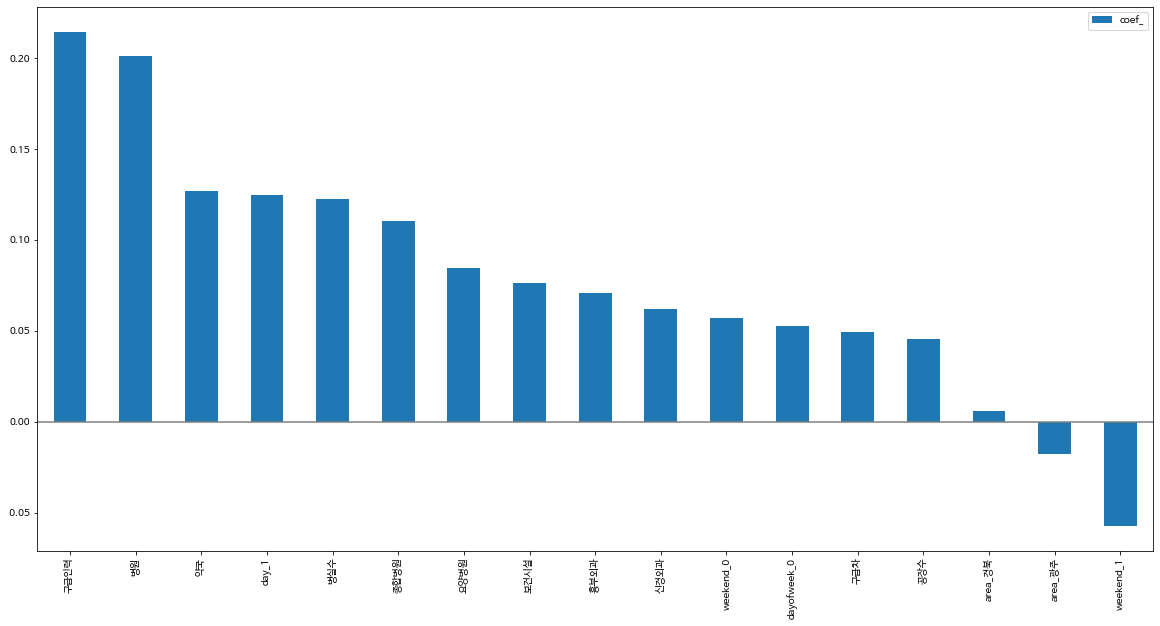

In [ ]:
used_elastic_net_coef.plot.bar(figsize=(20,10))
plt.axhline(0, color='grey')

In [ ]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
scores = cross_val_score(elastic_net, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(-scores)
print(rmse)
print(sum(rmse)/len(rmse))

[1.2162781  1.25091527 1.22982988 1.24515483 1.22949563]
1.234334743218017


# RMSE 결과

### 선형 회귀
- Root Mean Squared Error (RMSE) : 1.2185

### 릿지 회귀
- Root Mean Squared Error (RMSE) : 1.2184
- SGD: Root Mean Squared Error (RMSE) : 1.2349

### 라쏘 회귀
- Root Mean Squared Error (RMSE) : 1.2396
- SGD: Root Mean Squared Error (RMSE) : 1.2254

### 엘라스틱넷
- Root Mean Squared Error (RMSE) : 1.2261

In [ ]:
save_model_coef.to_csv('/content/drive/MyDrive/동아리_스터디_대외활동/기상청 공모전/data/save_model_coef.csv')

# 검증 데이터 셋

In [ ]:
# 'lin_reg', 'ridge_reg', 'lasso_reg', 'elastic_net'
